In [1]:
import numpy as np
import pandas as pd

In [2]:
# Try reading the CSV file with different encodings
encodings_to_try = ['utf-8', 'latin-1', 'ISO-8859-1']

In [3]:
df= []
for encoding in encodings_to_try:
    try:
        df = pd.read_csv("spam.csv", encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break  # Stop trying encodings once successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")


Failed to read with encoding: utf-8
Successfully read the file with encoding: latin-1


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
748,ham,Is there a reason we've not spoken this year? ...,NaN,NaN,NaN
5429,ham,"Er yeah, i will b there at 15:26, sorry! Just ...",NaN,NaN,NaN
999,ham,"Aight will do, thanks again for comin out",NaN,NaN,NaN
3417,spam,LIFE has never been this much fun and great un...,NaN,NaN,NaN
2227,ham,Oh k.k..where did you take test?,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop the last three columns
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [8]:
df.sample(5)

,v1,v2
3817,spam,74355 XMAS iscoming & ur awarded either å£500 ...
4011,ham,Discussed with your mother ah?
1204,spam,WIN a year supply of CDs 4 a store of ur choic...
480,ham,"Almost there, see u in a sec"
269,spam,Ringtone Club: Get the UK singles chart on you...


In [9]:
# rename the columns
df.rename(columns={"v1": "target", "v2": "text"}, inplace=True)

In [10]:
df.sample(5)

,target,text
1026,ham,Yes da. Any plm at ur office
5185,ham,I just cooked a rather nice salmon a la you
4952,ham,I lost 4 pounds since my doc visit last week w...
3733,ham,"4 tacos + 1 rajas burrito, right?"
4887,ham,You have to pls make a note of all she.s expos...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
# labeling the target column
df["target"] = encoder.fit_transform(df["target"])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check for the duplicate values
df.duplicated().sum()

403

In [16]:
# remove the duplicate values
df = df.drop_duplicates(keep="first")

In [17]:
df.shape

(5169, 2)

In [18]:
df.duplicated().sum()

0

## 2. EDA (Exploratory Data Analysis)

In [19]:
# checking how many are ham (0) and how many are spam (1)
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

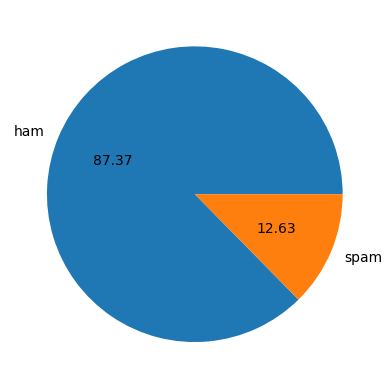

In [20]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f" )
plt.show()

In [21]:
# Data is imbalanced

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df["num_of_charactors"] = df["text"].apply(len)
df["num_of_charactors"]

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_of_charactors, Length: 5169, dtype: int64

In [24]:
df.head()

,target,text,num_of_charactors
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# find the num of words
df["num_of_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))
df["num_of_words"]

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_of_words, Length: 5169, dtype: int64

In [26]:
df.head()

,target,text,num_of_charactors,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# find the num of words
df["num_of_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
df["num_of_sentences"]

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_of_sentences, Length: 5169, dtype: int64

In [28]:
df.head()

,target,text,num_of_charactors,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
# applying describe function on num of characters , words and sentences
df[["num_of_charactors","num_of_words","num_of_sentences"]].describe()

,num_of_charactors,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# ham
df[df["target"]== 0][["num_of_charactors","num_of_words","num_of_sentences"]].describe()

,num_of_charactors,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# spam
df[df["target"]== 1][["num_of_charactors","num_of_words","num_of_sentences"]].describe()

,num_of_charactors,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
# we can see that the spam messages are commonly longer than ham

In [33]:
import seaborn as sns

<Axes: xlabel='num_of_charactors', ylabel='Count'>

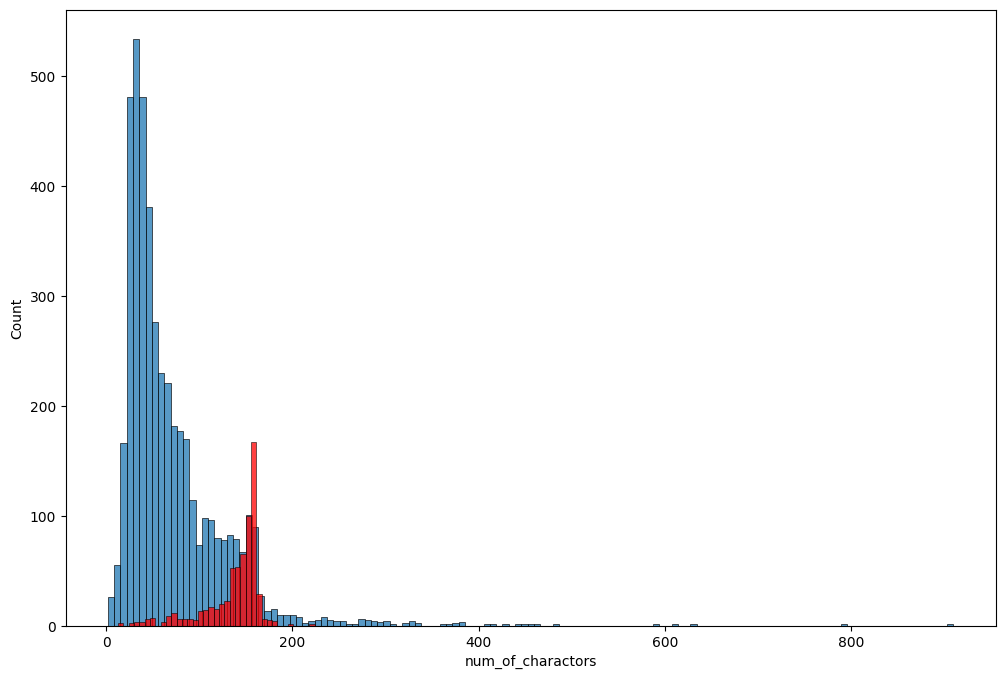

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"] == 0]["num_of_charactors"])
sns.histplot(df[df["target"] == 1]["num_of_charactors"], color="red")

<Axes: xlabel='num_of_words', ylabel='Count'>

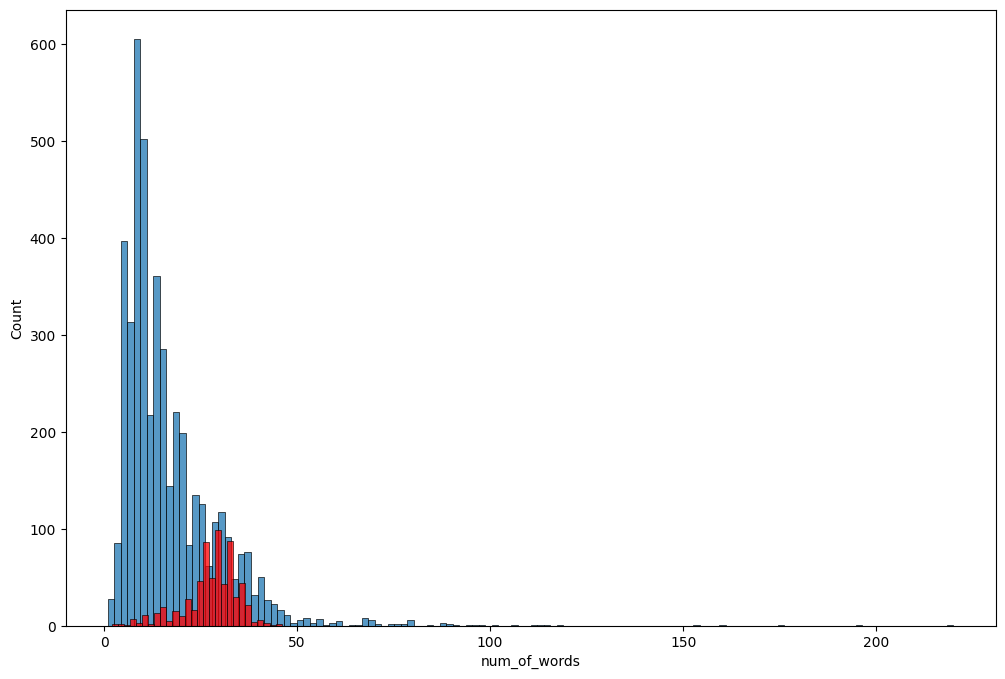

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"] == 0]["num_of_words"])
sns.histplot(df[df["target"] == 1]["num_of_words"], color="red")

<Axes: xlabel='num_of_sentences', ylabel='Count'>

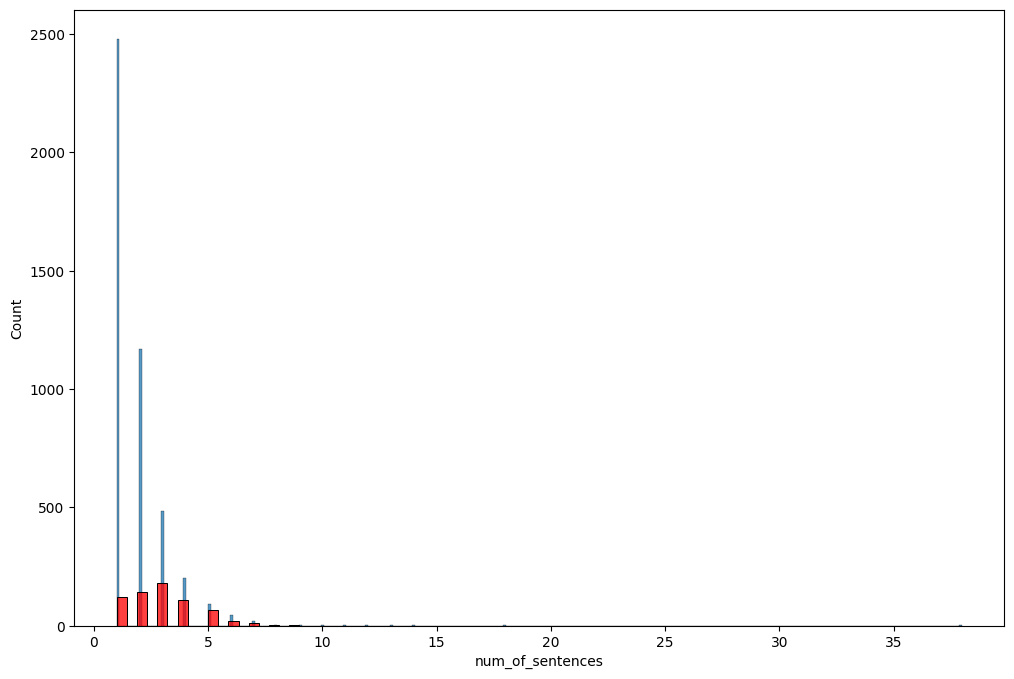

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"] == 0]["num_of_sentences"])
sns.histplot(df[df["target"] == 1]["num_of_sentences"], color="red")

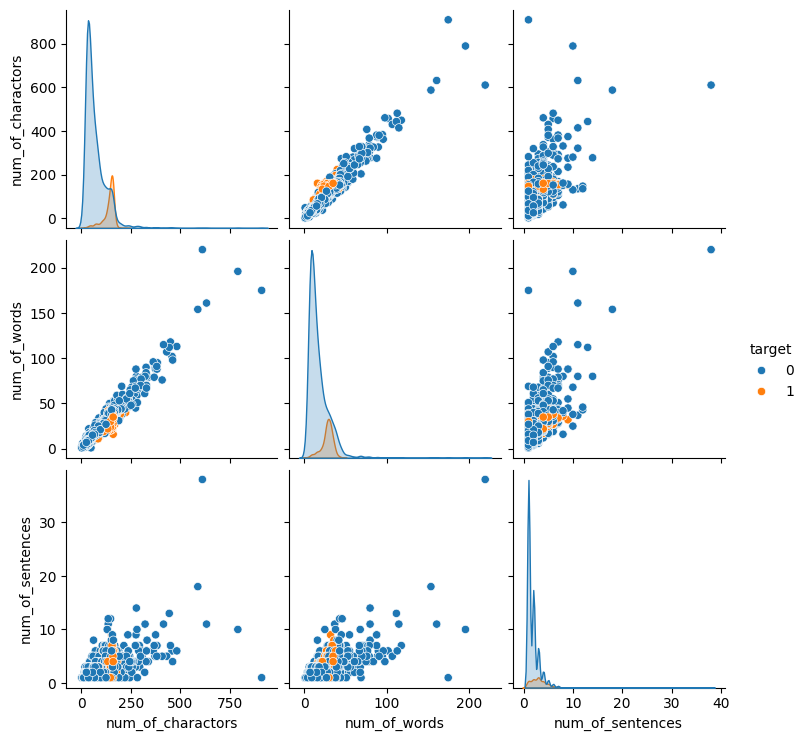

In [37]:
sns.pairplot(df, hue="target")
plt.show()

<Axes: >

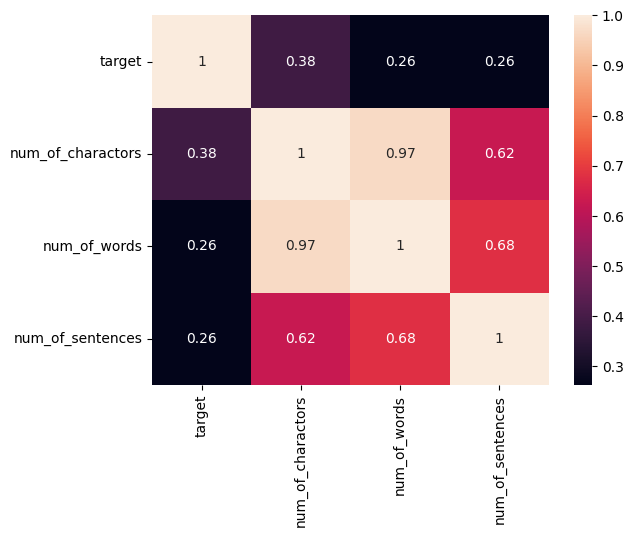

In [38]:
sns.heatmap(df.drop("text", axis=1).corr(), annot= True)

## 3. Data Preprocessing:
    . Lower case
    . tokenziation
    . Remove punctuations and stop words
    . removing special charaters
    .  stemming

In [39]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download("stopwords")
def transform_text(text):
    # Lower case
    text = text.lower()

    # tokenziation
    text = nltk.word_tokenize(text)

    # Removing special charaters
    y = []
    for word in text:
        if word.isalnum():
            y.append(word)

    # cloning
    text = y[:]
    y.clear()

    for word in text:
        if word not in stopwords.words("english") and word not in string.punctuation:
            y.append(word)
    
    text = y[:]
    y.clear()

    for word in text:
        y.append(ps.stem(word))

    text = y[:]

    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
transform_text("hi i am Bilal what's your name brother? underestimating")

'hi bilal name brother underestim'

In [41]:
df["transformed_text"] = df["text"].apply(transform_text)

In [42]:
df.head()

,target,text,num_of_charactors,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=750, height=750, background_color="white", min_font_size=10)

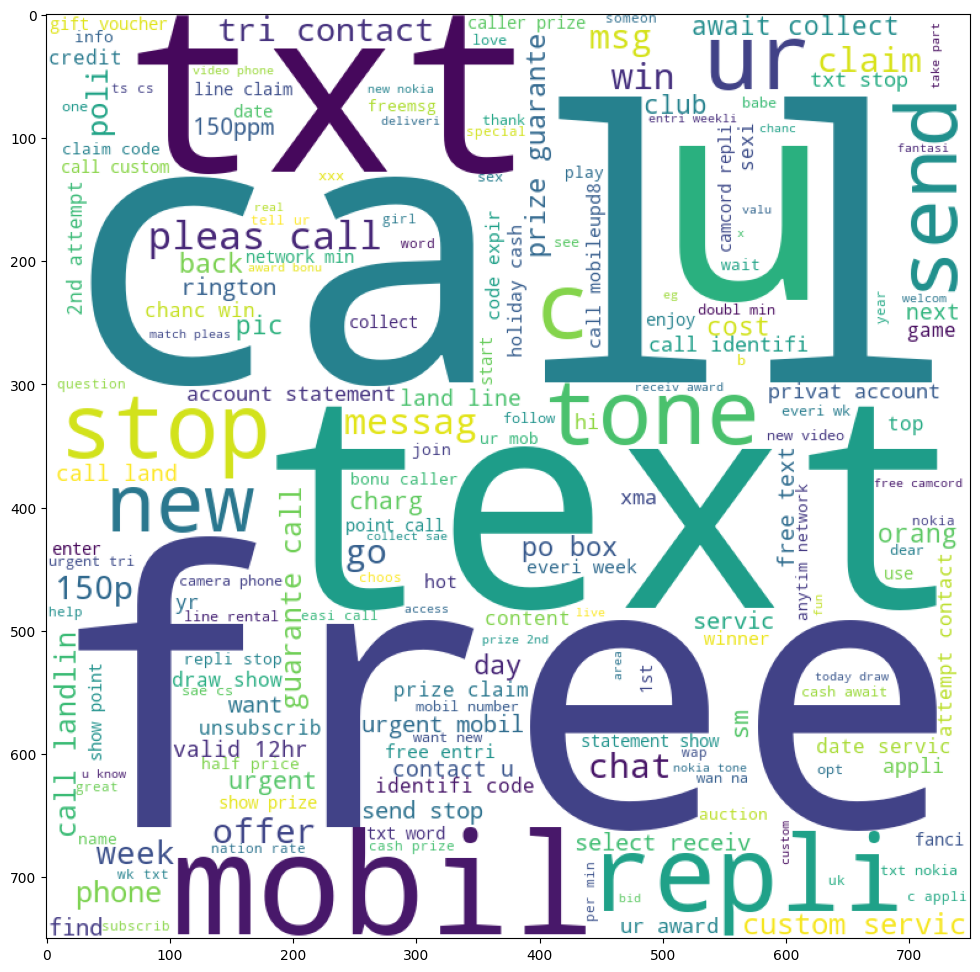

In [44]:
# make word cloud for spam messages
spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(16,12))
plt.imshow(spam_wc)


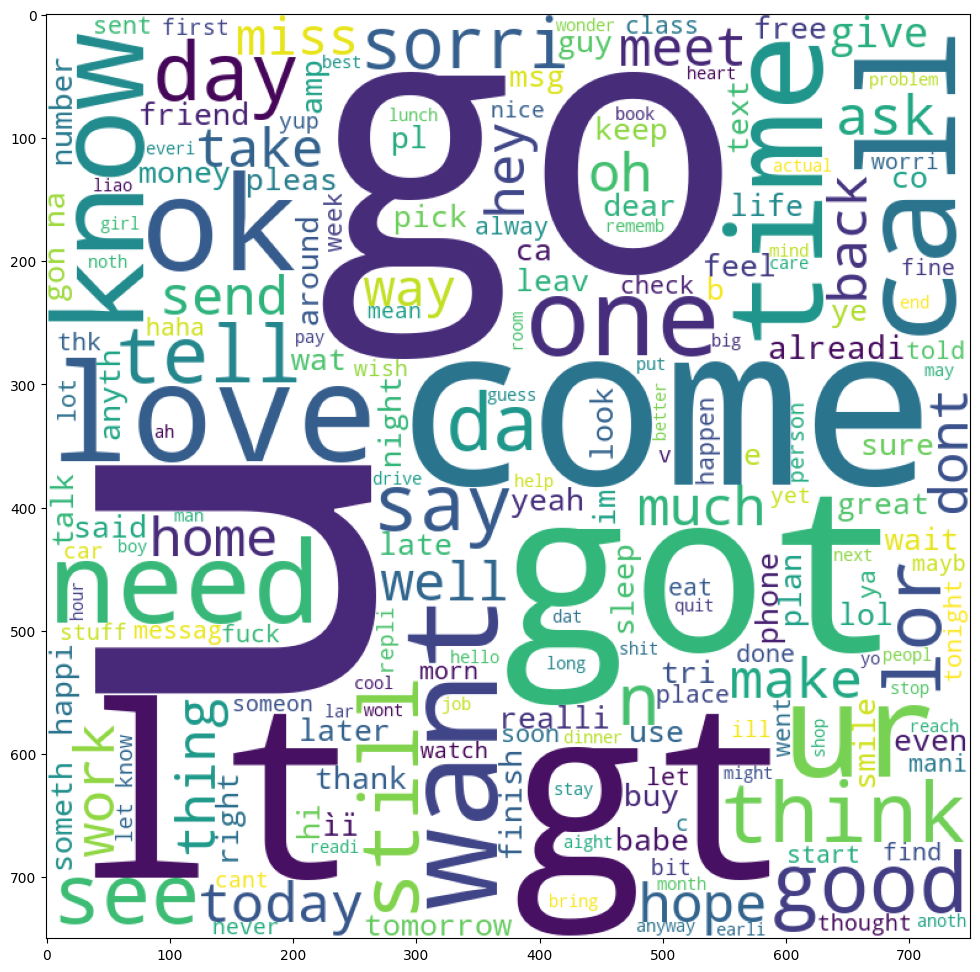

In [45]:
# make word cloud for ham messages
spam_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(16,12))
plt.imshow(spam_wc)

In [46]:
# for spam
spam_corpus = []
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)


9939

In [47]:
from collections import Counter

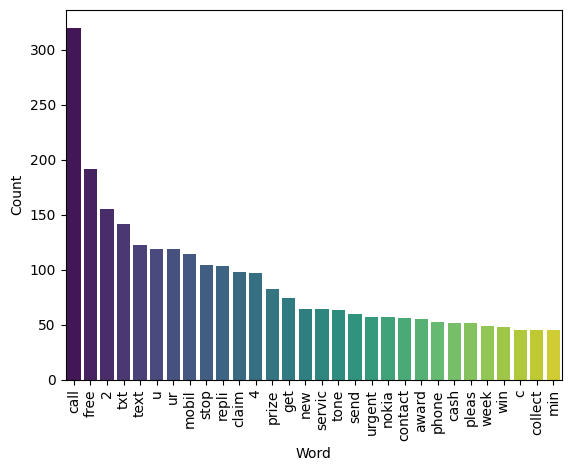

In [48]:
common_words = Counter(spam_corpus).most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', hue='Word', data=df_common_words, palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [49]:
# for ham 
ham_corpus = []
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)


35404

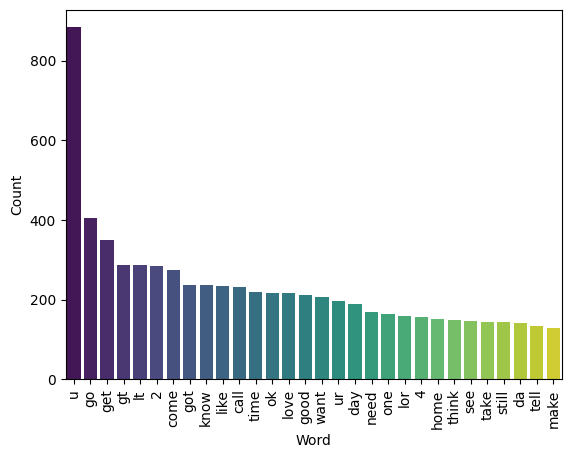

In [50]:
common_words = Counter(ham_corpus).most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', hue='Word', data=df_common_words, palette='viridis')
plt.xticks(rotation=90)
plt.show()

## 4. Model Building

In [51]:
# we are starting with Naive Bayes because you know the result of this model is better than others for textual data.
# but before going to work with models lets convert text message into vectors

# we have multiple ways to convert text message into vectors
# CounterVectorizer, TfidfVectorizer, and other
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [52]:
X = cv.fit_transform(df["transformed_text"]).toarray()
X.shape

(5169, 6708)

In [53]:
Y = df["target"].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_text, Y_train, Y_text = train_test_split(X, Y, test_size=0.2, random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [57]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [58]:
# GaussianNB
gnb.fit(X_train, Y_train)
Y_pred_1 = gnb.predict(X_text)
print(accuracy_score(Y_text, Y_pred_1))
print(confusion_matrix(Y_text, Y_pred_1))
print(precision_score(Y_text, Y_pred_1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [59]:
# MultinomialNB
mnb.fit(X_train, Y_train)
Y_pred_2 = mnb.predict(X_text)
print(accuracy_score(Y_text, Y_pred_2))
print(confusion_matrix(Y_text, Y_pred_2))
print(precision_score(Y_text, Y_pred_2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [60]:
# BernoulliNB
bnb.fit(X_train, Y_train)
Y_pred_3 = bnb.predict(X_text)
print(accuracy_score(Y_text, Y_pred_3))
print(confusion_matrix(Y_text, Y_pred_3))
print(precision_score(Y_text, Y_pred_3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [61]:
# with tfidf
X = tfidf.fit_transform(df["transformed_text"]).toarray()
X.shape

(5169, 6708)

In [62]:
X_train,X_text, Y_train, Y_text = train_test_split(X, Y, test_size=0.2, random_state=2)

In [63]:
# GaussianNB
gnb.fit(X_train, Y_train)
Y_pred_1 = gnb.predict(X_text)
print(accuracy_score(Y_text, Y_pred_1))
print(confusion_matrix(Y_text, Y_pred_1))
print(precision_score(Y_text, Y_pred_1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [64]:
# MultinomialNB
mnb.fit(X_train, Y_train)
Y_pred_2 = mnb.predict(X_text)
print(accuracy_score(Y_text, Y_pred_2))
print(confusion_matrix(Y_text, Y_pred_2))
print(precision_score(Y_text, Y_pred_2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [65]:
# BernoulliNB
bnb.fit(X_train, Y_train)
Y_pred_3 = bnb.predict(X_text)
print(accuracy_score(Y_text, Y_pred_3))
print(confusion_matrix(Y_text, Y_pred_3))
print(precision_score(Y_text, Y_pred_3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [66]:
# now i think tfidfVectorizer should be good with MultinomialNB (mnb) becauser the precision_score is 1 meaning the model isn't made a single mistake in labeling of ham or spam.
# tfidf -> mnb
# but before finalization I prefer to implement some other classification models

In [67]:
# import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [68]:
svc = SVC(kernel="sigmoid", gamma=1.0)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)

In [69]:
classifiers = {
    "mnb": mnb,
    "gnb": gnb,
    "bnb": bnb,
    "svc": svc,
    "rfc": rfc,
    "knc": knc,
    "dtc": dtc
}

In [70]:
def train_a_classifier(classifier, x_train, y_train, x_test, y_test ):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [71]:
train_a_classifier(svc, X_train, Y_train, X_text, Y_text)

(0.9729206963249516, 0.9741379310344828)

In [72]:
accuracy_scores = []
precision_scores = []

for name, clf in classifiers.items():
    accuracy, precision = train_a_classifier(clf, X_train, Y_train, X_text, Y_text)

    print("For ", name )
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

For  mnb
Accuracy:  0.9593810444874274
Precision:  1.0
For  gnb
Accuracy:  0.8762088974854932
Precision:  0.5231481481481481
For  bnb
Accuracy:  0.9700193423597679
Precision:  0.9734513274336283
For  svc
Accuracy:  0.9729206963249516
Precision:  0.9741379310344828
For  rfc
Accuracy:  0.971953578336557
Precision:  1.0
For  knc
Accuracy:  0.9003868471953579
Precision:  1.0
For  dtc
Accuracy:  0.9352030947775629
Precision:  0.8380952380952381


In [73]:
performance_df = pd.DataFrame({"Algorithm": classifiers.keys(), "Accuracy": accuracy_scores, "Precision": precision_scores}).sort_values(by = "Precision", ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,mnb,0.959381,1.000000
4,rfc,0.971954,1.000000
5,knc,0.900387,1.000000
3,svc,0.972921,0.974138
2,bnb,0.970019,0.973451
6,dtc,0.935203,0.838095
1,gnb,0.876209,0.523148


In [74]:
import pickle
pickle.dump(tfidf, open("vectorizer.pkl",  "wb"))
pickle.dump(rfc, open("model.pkl",  "wb"))